In [33]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
style.use('fivethirtyeight')

In [34]:
current_races = pd.read_csv('/Users/Alexz/CodeMaster/capstone/capstone_repo/data/2018_final.csv')
predictions = pd.read_csv('/Users/Alexz/CodeMaster/capstone/capstone_repo/data/predictions.csv')
data = pd.read_csv('/Users/Alexz/CodeMaster/capstone/capstone_repo/data/sens_final.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
predictions.drop('Unnamed: 0', axis=1, inplace=True)

In [35]:
unemployed = pd.read_csv('/Users/Alexz/CodeMaster/capstone/capstone_repo/data/state_unemployment.csv')
unemployed.head()

,state_year,state,year,unemployment_rate_state_oct
0,AL_1976,AL,1976,7.0
1,AL_1977,AL,1977,6.8
2,AL_1978,AL,1978,6.5
3,AL_1979,AL,1979,7.2
4,AL_1980,AL,1980,9.6


In [36]:
predictions.head()

,race_id,state,abbrev,predictions
0,2018_AZ_sen,Arizona,AZ,1
1,2018_CA_sen,California,CA,0
2,2018_CT_sen,Connecticut,CT,0
3,2018_DE_sen,Delaware,DE,0
4,2018_FL_sen,Florida,FL,0


In [54]:
# list of states with elections
states_2018 = list(predictions.abbrev.unique())
states_2018

['AZ',
 'CA',
 'CT',
 'DE',
 'FL',
 'HI',
 'IN',
 'ME',
 'MD',
 'MA',
 'MI',
 'MS',
 'MN',
 'MO',
 'MT',
 'NE',
 'NV',
 'NJ',
 'NM',
 'NY',
 'ND',
 'OH',
 'PA',
 'RI',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

### Unemployment over Time Graph

In [27]:
unemp_relevant = unemployed[unemployed['state'].isin(states_2018)]
unemp_relevant.head()

,state_year,state,year,unemployment_rate_state_oct
84,AZ_1976,AZ,1976,9.3
85,AZ_1977,AZ,1977,7.6
86,AZ_1978,AZ,1978,5.7
87,AZ_1979,AZ,1979,4.9
88,AZ_1980,AZ,1980,6.7


In [66]:
unemp_relevant.groupby('state').head(200)

,state_year,state,year,unemployment_rate_state_oct
84,AZ_1976,AZ,1976,9.3
85,AZ_1977,AZ,1977,7.6
86,AZ_1978,AZ,1978,5.7
87,AZ_1979,AZ,1979,4.9
88,AZ_1980,AZ,1980,6.7
89,AZ_1981,AZ,1981,6.6
90,AZ_1982,AZ,1982,11.4
91,AZ_1983,AZ,1983,7.0
92,AZ_1984,AZ,1984,5.2
93,AZ_1985,AZ,1985,6.5


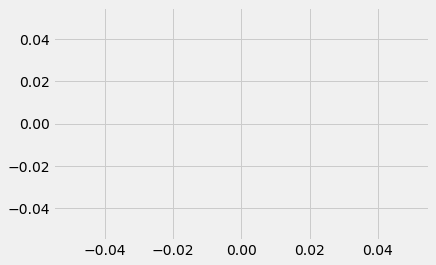

In [63]:
palette = plt.get_cmap('Set1')

num = 0
for state in states_2018:
    num += 1
    plt.plot(x=unemp_relevant['year'],y =  unemp_relevant['unemployment_rate_state_oct'])